In [1]:
%pylab inline
import networkx as nx
import scipy as sp
import scipy

Populating the interactive namespace from numpy and matplotlib


In [2]:
edges=np.loadtxt("edges.txt",dtype=np.int32)
nodes=np.loadtxt("nodes.txt",dtype=np.int32)
G=nx.Graph()

for i in range(4):
    G.add_nodes_from(nodes[nodes[:,1]==i][:,0],labels=i)
G.add_edges_from(edges)

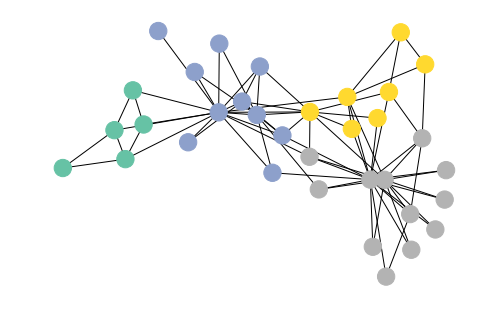

In [3]:
values= [node[1]['labels'] for node in G.nodes(data=True)]

nx.draw_spring(G, cmap=plt.get_cmap('Set2'), node_color=values)

In [7]:
A=nx.to_numpy_matrix(G)

In [44]:
import torch as th


In [45]:
import torch.nn.functional as F


In [17]:
tA=th.from_numpy(A).float()

In [18]:
tA.shape

torch.Size([34, 34])

In [57]:
u=th.randn(34,2,requires_grad=True)
v=th.randn(2,34,requires_grad=True)

In [58]:
optim=th.optim.Adam([u,v])

In [65]:
for i in range(100000):
    loss=(u@v-tA).norm()
    if i %1000==0:
        print(loss)
    optim.zero_grad()
    
    loss.backward()

    optim.step()

tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)
tensor(9.2191, grad_fn=<NormBackward0>)


KeyboardInterrupt: 

In [66]:
tA

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 1., 0.]])

In [67]:
u@v-tA

tensor([[ 0.1481, -0.8622,  0.1378,  ..., -0.0460, -0.0763, -0.0430],
        [-0.8622,  0.1281, -0.8719,  ..., -0.0403, -0.0674, -0.0380],
        [ 0.1378, -0.8719,  0.1281,  ..., -0.0403, -0.0674, -0.0380],
        ...,
        [-0.0460, -0.0403, -0.0403,  ...,  0.1693,  0.2409,  0.1353],
        [-0.0763, -0.0674, -0.0674,  ...,  0.2409,  0.3437, -0.8069],
        [-0.0430, -0.0380, -0.0380,  ...,  0.1353, -0.8069,  0.1085]],
       grad_fn=<ThSubBackward>)

In [68]:
w=(u+v.t())/2

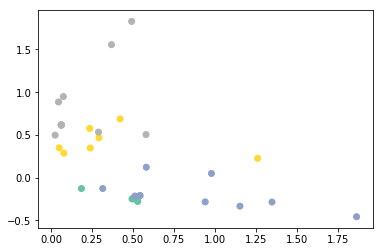

In [69]:
plt.scatter(w[:,1].data.numpy(),w[:,0].data.numpy(),c=values,cmap='Set2')

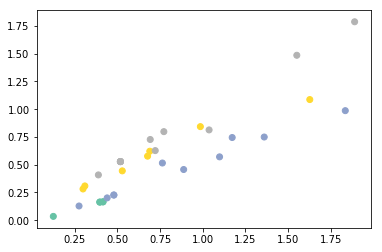

In [70]:
plt.scatter(v[1,:].data.numpy(),v[0,:].data.numpy(),c=values,cmap='Set2')

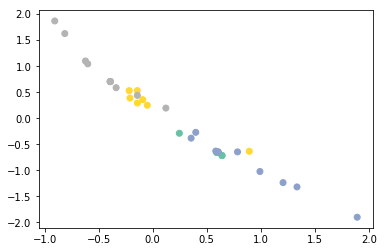

In [71]:
plt.scatter(u[:,1].data.numpy(),u[:,0].data.numpy(),c=values,cmap='Set2')

In [7]:
def normalized_A(G):
    A = nx.to_scipy_sparse_matrix(G,format='csr')
    I=scipy.sparse.eye(A.shape[0])
    n,m = A.shape
    diags = A.sum(axis=1).flatten()
    D = scipy.sparse.spdiags(diags, [0], m, n, format='csr')
    AH=A+I
    with scipy.errstate(divide='ignore'):
           diags_sqrt = 1.0/scipy.sqrt(diags)
    diags_sqrt[scipy.isinf(diags_sqrt)] = 0
    DH = scipy.sparse.spdiags(diags_sqrt, [0], m, n, format='csr')
    normalized_A=DH.dot(AH.dot(DH))
    return normalized_A

In [39]:
def ReLU(x):
    return np.maximum(x, 0)

num_input_features=34
num_output_features=2

hidden_dim=[num_input_features,34,24,num_output_features]
num_layers=len(hidden_dim)-1

num_nodes=G.number_of_nodes()
H=[np.random.randn(num_nodes,num_input_features) for i in range(num_layers+1)]
W=[np.random.randn(hidden_dim[i],hidden_dim[i+1])*3 for i in range(num_layers)]


In [40]:
NA=normalized_A(G)
H[0]=np.eye(num_input_features)
for i in range(num_layers):
    H[i+1]=ReLU(NA@H[i]@W[i])

In [41]:
H[3][:,0]

array([330.65527807, 328.33212954, 327.29190903, 334.35929148,
       254.98186216, 848.1842729 , 367.62767144, 680.85927011,
       336.21841481, 324.98512806, 257.44082247, 345.22589289,
       389.92371201, 251.94775242, 262.56207955, 300.10323616,
       304.4027439 , 169.89019483, 181.95920536, 205.9823762 ,
       257.33860518, 253.01664177, 216.53126085, 195.03677365,
       391.22075663, 346.15820503, 196.40311898, 222.7800006 ,
       180.89261242, 189.85892877, 177.72642253, 212.64308276,
       185.25827475, 155.83209081])

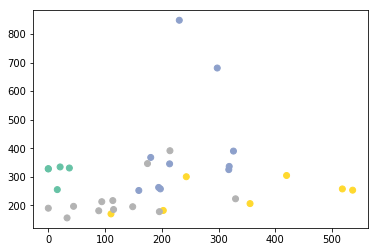

In [42]:
plt.scatter(H[3][:,1],H[3][:,0],c=values,cmap='Set2')